In [1]:
# This file was created in Google Colab

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

@article { lecun2010mnist,

  title = {MNIST handwritten digit database},

  author = {LeCun, Yann and Cortes, Corinna and Burges, CJ},

  journal = {ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},

  volume = {2},

  year = {2010}

}

## Loading the dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Exploratory Data Analysis

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
train_images.shape

(60000, 28, 28)

`60,000 images in training_data`

with 28x28 pixel format

In [7]:
train_labels.shape

(60000,)

In [8]:
print("Shape of test_images: ", test_images.shape)
print("Shape of test_labels: ", test_labels.shape)

Shape of test_images:  (10000, 28, 28)
Shape of test_labels:  (10000,)


### Checking a sample of training images


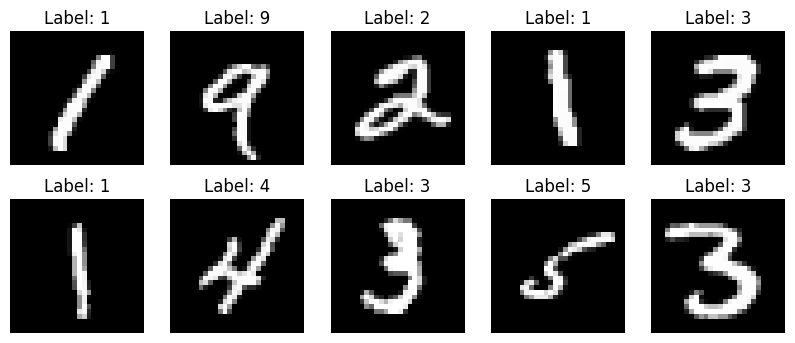

In [47]:
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i + 3], cmap='gray')
    plt.title(f'Label: {train_labels[i + 3]}')
    plt.axis('off')
plt.show()

fig.savefig('/content/sample_data/sample_training_images.png')

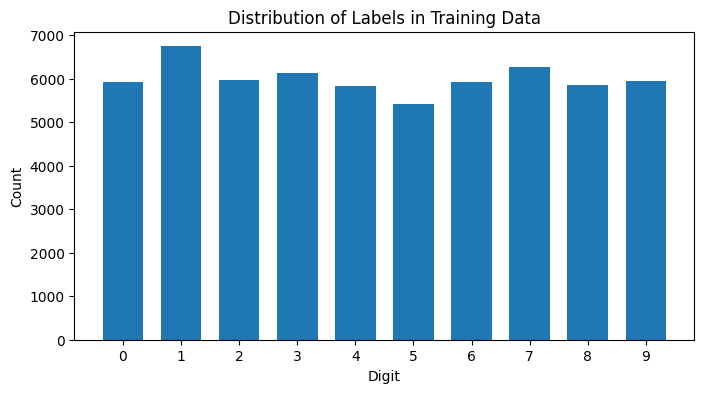

In [48]:
fig1 = plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=range(11), align='left', rwidth=0.7)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Data')
plt.xticks(range(10), labels=[str(i) for i in range(10)])
plt.show()

fig1.savefig('/content/sample_data/dist_of_labels_training.png')

In [11]:
print(f'Mean pixel value: {train_images.mean()}')
print(f'Standard deviation of pixel values: {train_images.std()}')

Mean pixel value: 33.318421449829934
Standard deviation of pixel values: 78.56748998339798


## Preprocessing

In [12]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

## Model 1

In [13]:
from tensorflow.keras import models, layers

model = models.Sequential()

In [14]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.fit(train_images, train_labels, epochs=5, batch_size=200, validation_split=0.2)

Epoch 1/5
240/240 [==============================] - 2s 7ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0577 - val_accuracy: 0.9868
Epoch 2/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.0603 - val_accuracy: 0.9866
Epoch 3/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0610 - val_accuracy: 0.9871
Epoch 4/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0639 - val_accuracy: 0.9871
Epoch 5/5
240/240 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9871


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0512 - accuracy: 0.9864
Test accuracy: 0.9864000082015991


In [36]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

predictions_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(test_labels, predictions_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9864


In [38]:
print('Classification Report:')
print(classification_report(test_labels, predictions_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [39]:
print('Confusion Matrix:')
print(confusion_matrix(test_labels, predictions_classes))

Confusion Matrix:
[[ 974    0    0    0    0    1    2    1    2    0]
 [   0 1129    2    1    0    0    1    1    1    0]
 [   3    2 1015    1    1    0    1    5    4    0]
 [   0    0    2  998    0    6    0    0    4    0]
 [   0    1    0    0  977    0    0    0    0    4]
 [   1    0    1    8    0  877    4    0    1    0]
 [   5    3    0    1    4    3  939    0    3    0]
 [   0    1    8    1    0    1    0 1013    2    2]
 [   5    0    3    1    0    1    0    2  957    5]
 [   0    2    0    4    9    3    0    5    1  985]]


#### Randomly checking the predictions

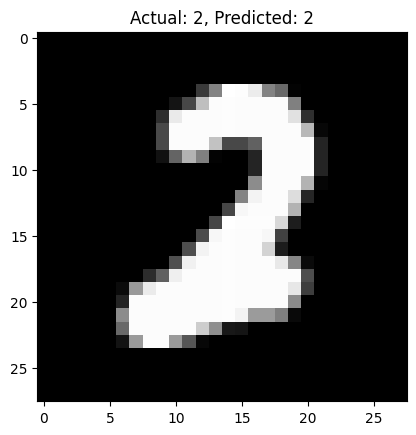

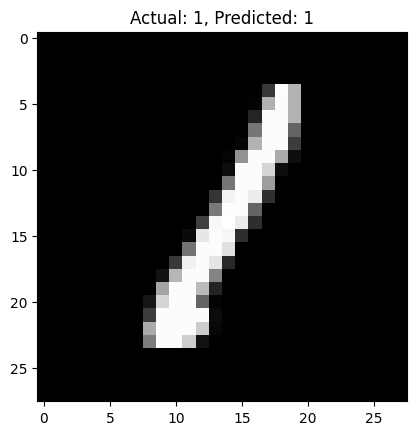

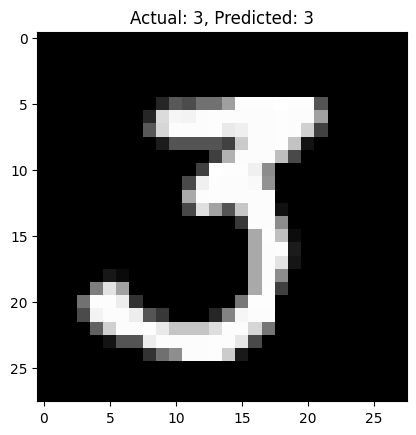

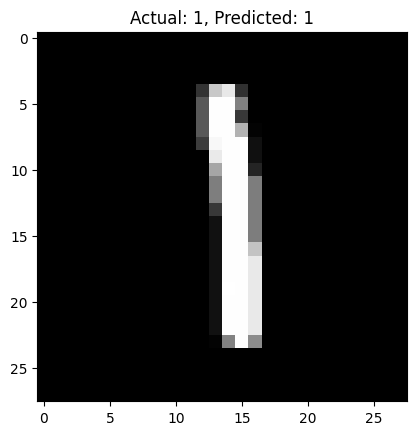

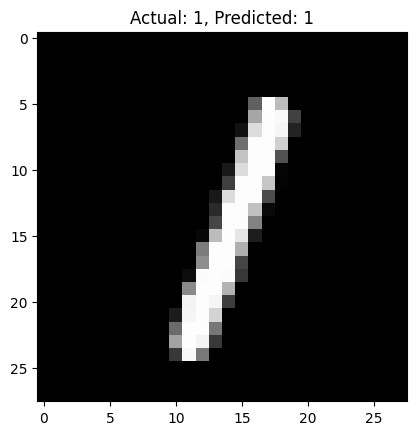

In [51]:
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)

for index in random_indices:
    prediction_class = np.argmax(predictions[index])
    actual_class = test_labels[index]
    image = test_images[index]

    plt.imshow(image, cmap='gray')
    plt.title(f'Actual: {actual_class}, Predicted: {prediction_class}')
    plt.show()


'''
to download the images following code was used
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)

for index in random_indices:
    prediction_class = np.argmax(predictions[index])
    actual_class = test_labels[index]
    image = test_images[index]

    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Actual: {actual_class}, Predicted: {prediction_class}')
    ax.axis('off')

    filename = f'/content/sample_data/image_random_{index}.png'
    fig.savefig(filename)
    plt.close(fig)
    print(f'Image saved: {filename}')
'''

#### Visualizing the incorrect predictions

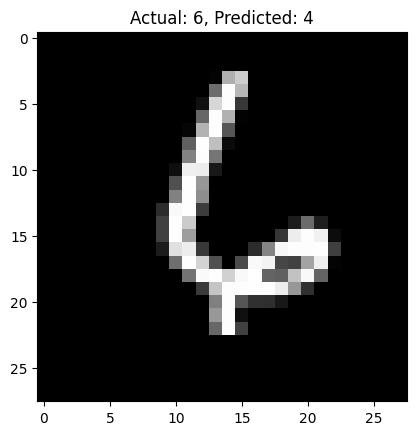

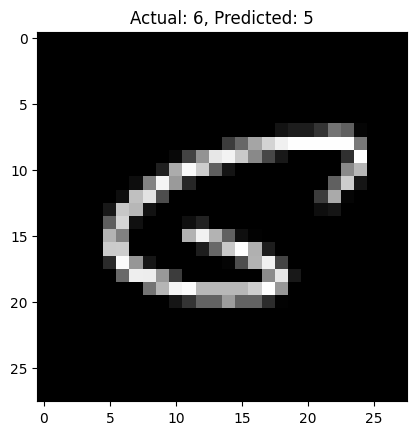

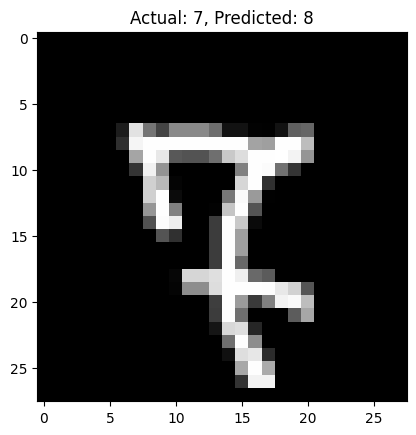

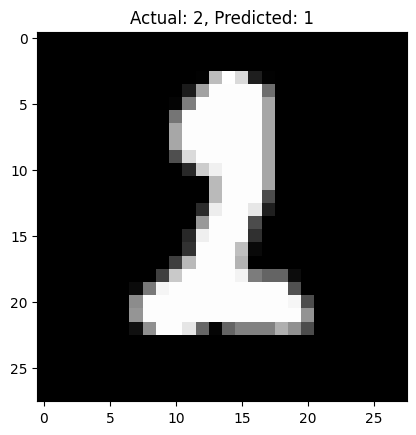

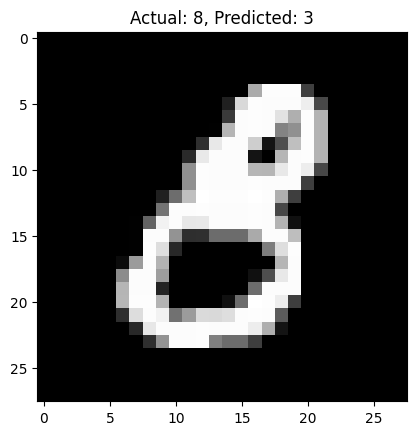

In [52]:
predictions_classes = np.argmax(predictions, axis=1)
incorrect_indices = np.where(predictions_classes != test_labels)[0]

num_samples = 5
random_indices = np.random.choice(incorrect_indices, min(num_samples, len(incorrect_indices)), replace=False)

for index in random_indices:
    prediction_class = predictions_classes[index]
    actual_class = test_labels[index]
    image = test_images[index]

    plt.imshow(image, cmap='gray')
    plt.title(f'Actual: {actual_class}, Predicted: {prediction_class}')
    plt.show()

'''
to download following code was use
predictions_classes = np.argmax(predictions, axis=1)
incorrect_indices = np.where(predictions_classes != test_labels)[0]

num_samples = 5
random_indices = np.random.choice(incorrect_indices, min(num_samples, len(incorrect_indices)), replace=False)

for index in random_indices:
    prediction_class = predictions_classes[index]
    actual_class = test_labels[index]
    image = test_images[index]

    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Actual: {actual_class}, Predicted: {prediction_class}')
    ax.axis('off')

    filename = f'/content/sample_data/image_incorrect_pred_{index}.png'
    fig.savefig(filename)
    plt.close(fig)
    print(f'Image saved: {filename}')
'''

In [45]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9864
